## 📶**Canonical Correlation Analysis (CCA)**
 - Canonical Correlation Analysis (CCA) is an advanced statistical technique used to probe the relationships between **two sets of multivariate variables** on the **same subjects.**
 - It is particularly applicable in circumstances **where multiple regression would be appropriate**, but there are multiple intercorrelated outcome variables.
 - CCA identifies and quantifies the associations among these two variable groups.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

**Read the dataset**

In [3]:
mm = pd.read_stata('mmreg.dta')
mm

,id,locus_of_control,self_concept,motivation,read,write,math,science,female
0,303.0,-0.84,-0.24,1.00,54.799999,64.500000,44.500000,52.599998,1.0
1,404.0,-0.38,-0.47,0.67,62.700001,43.700001,44.700001,52.599998,1.0
2,225.0,0.89,0.59,0.67,60.599998,56.700001,70.500000,58.000000,0.0
3,553.0,0.71,0.28,0.67,62.700001,56.700001,54.700001,58.000000,0.0
4,433.0,-0.64,0.03,1.00,41.599998,46.299999,38.400002,36.299999,1.0
...,...,...,...,...,...,...,...,...,...
595,464.0,0.94,-0.30,1.00,60.099998,67.099998,52.400002,55.299999,1.0
596,291.0,0.23,0.03,1.00,65.400002,56.700001,65.400002,58.000000,1.0
597,348.0,0.46,0.03,1.00,65.400002,51.500000,61.400002,60.700001,1.0
598,193.0,0.51,0.03,1.00,54.799999,54.099998,66.400002,41.700001,1.0


In [4]:
mm.isna().sum()

,0
id,0
locus_of_control,0
self_concept,0
motivation,0
read,0
write,0
math,0
science,0
female,0


In [5]:
mm.describe().T

,count,mean,std,min,25%,50%,75%,max
id,600.0,300.500000,173.348816,1.000000,150.750000,300.500000,450.250000,600.000000
locus_of_control,600.0,0.096533,0.670280,-2.230000,-0.372500,0.210000,0.510000,1.360000
self_concept,600.0,0.004917,0.705512,-2.620000,-0.300000,0.030000,0.440000,1.190000
motivation,600.0,0.660833,0.342729,0.000000,0.330000,0.670000,1.000000,1.000000
read,600.0,51.901833,10.102986,28.299999,44.200001,52.099998,60.099998,76.000000
write,600.0,52.384834,9.726455,25.500000,44.299999,54.099998,59.900002,67.099998
math,600.0,51.848999,9.414738,31.799999,44.500000,51.299999,58.374999,75.500000
science,600.0,51.763332,9.706173,26.000000,44.400002,52.599998,58.650000,74.199997
female,600.0,0.545000,0.498387,0.000000,0.000000,1.000000,1.000000,1.000000


🧑‍💻**Data Preprocessing**

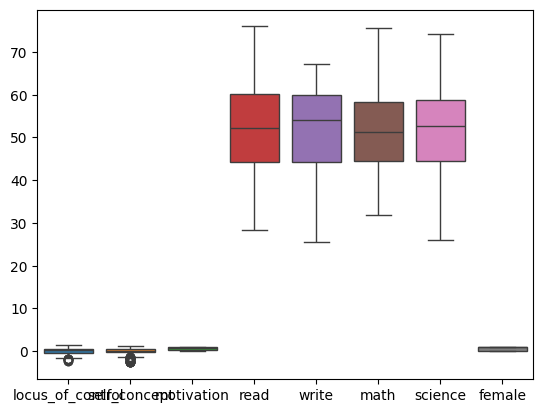

In [6]:
sns.boxplot(data=mm.drop('id', axis=1))
plt.show()

In [7]:
# Function to detect outliers using IQR
def detect_outliers_iqr(mm, column):
    q1 = mm[column].quantile(0.25)
    q3 = mm[column].quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr
    outliers = mm[(mm[column] < lower_bound) | (mm[column] > upper_bound)]
    return outliers
# Detect outliers in numerical columns
numerical_cols = ['locus_of_control', 'self_concept', 'motivation', 'read', 'write', 'math', 'science']
for col in numerical_cols:
    outliers = detect_outliers_iqr(mm, col)
    if not outliers.empty:
        print(f"Outliers in '{col}':")

    else:
        print(f"No outliers found in '{col}'")

Outliers in 'locus_of_control':
Outliers in 'self_concept':
No outliers found in 'motivation'
No outliers found in 'read'
No outliers found in 'write'
No outliers found in 'math'
No outliers found in 'science'


<Axes: ylabel='locus_of_control'>

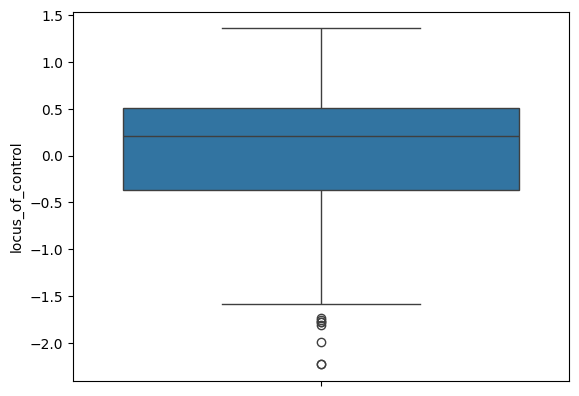

In [8]:
sns.boxplot(mm['locus_of_control'])

<Axes: ylabel='self_concept'>

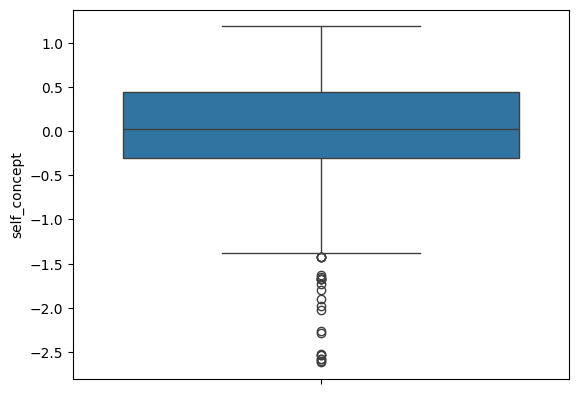

In [10]:
sns.boxplot(mm['self_concept'])

## In this `locus_of_control` & `self_concept` have outliers. So, we need to remove this outliers.

In [11]:
df = mm.copy()

In [12]:
# Step 1: Calculate Q1 (25th percentile) and Q3 (75th percentile)
Q1 = df['locus_of_control'].quantile(0.25)
Q3 = df['locus_of_control'].quantile(0.75)

# Step 2: Calculate IQR
IQR = Q3 - Q1

# Step 3: Define lower and upper bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

In [13]:
#  Remove the outliers and make a new dataframe
df_no_outliers = df[(df['locus_of_control'] >= lower_bound) & (df['locus_of_control'] <= upper_bound)]

In [14]:
df_no_outliers = df[(df['self_concept'] >= lower_bound) & (df['self_concept'] <= upper_bound)]

In [15]:
new_df = df_no_outliers.copy()

In [17]:
new_df

,id,locus_of_control,self_concept,motivation,read,write,math,science,female
0,303.0,-0.84,-0.24,1.00,54.799999,64.500000,44.500000,52.599998,1.0
1,404.0,-0.38,-0.47,0.67,62.700001,43.700001,44.700001,52.599998,1.0
2,225.0,0.89,0.59,0.67,60.599998,56.700001,70.500000,58.000000,0.0
3,553.0,0.71,0.28,0.67,62.700001,56.700001,54.700001,58.000000,0.0
4,433.0,-0.64,0.03,1.00,41.599998,46.299999,38.400002,36.299999,1.0
...,...,...,...,...,...,...,...,...,...
595,464.0,0.94,-0.30,1.00,60.099998,67.099998,52.400002,55.299999,1.0
596,291.0,0.23,0.03,1.00,65.400002,56.700001,65.400002,58.000000,1.0
597,348.0,0.46,0.03,1.00,65.400002,51.500000,61.400002,60.700001,1.0
598,193.0,0.51,0.03,1.00,54.799999,54.099998,66.400002,41.700001,1.0


🧑‍💻 After remove outliers here we have 586 rows, that means 14 rows are removed that have outliers.

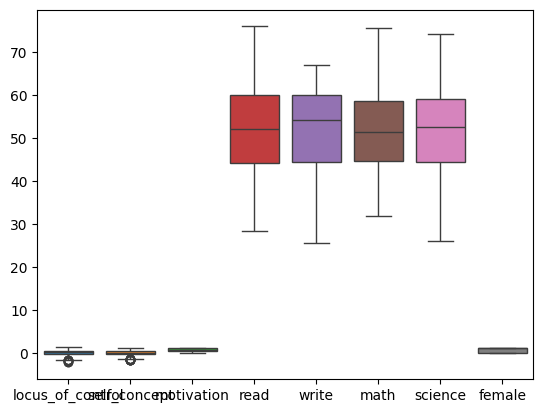

In [18]:
sns.boxplot(data=new_df.drop('id', axis=1))
plt.show()

<Axes: >

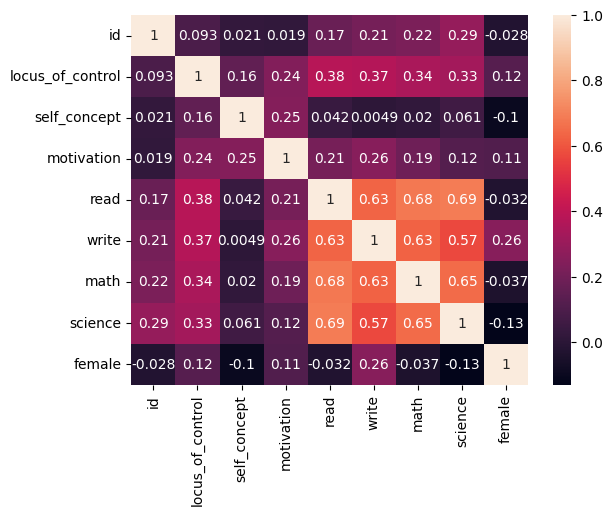

In [19]:
sns.heatmap(new_df.corr(), annot=True)

🧑‍💻**Apply Canonical Correlation method**

🧑‍💻**Separate the  two variable groups** considering one of "Psychological variables" and another is "Academic variables"

In [20]:
# Psychological variables
X = new_df[['locus_of_control', 'self_concept', 'motivation']]

# Academic variables
Y = new_df[['read', 'write', 'math', 'science']]

### Apply the Canonical Correlation method

In [21]:
from sklearn.cross_decomposition import CCA

In [31]:
cca = CCA(n_components=1)
cca.fit(X, Y)

CCA(n_components=1)

In [32]:
# Transform the data to get the canonical variates (scores)
X_c, Y_c = cca.transform(X, Y)

In [33]:
# Get the canonical correlation by correlating the transformed data
canonical_correlation = np.corrcoef(X_c[:, 0], Y_c[:, 0])[0, 1]

print(f"Canonical Correlation: {canonical_correlation:.4f}")

Canonical Correlation: 0.4588


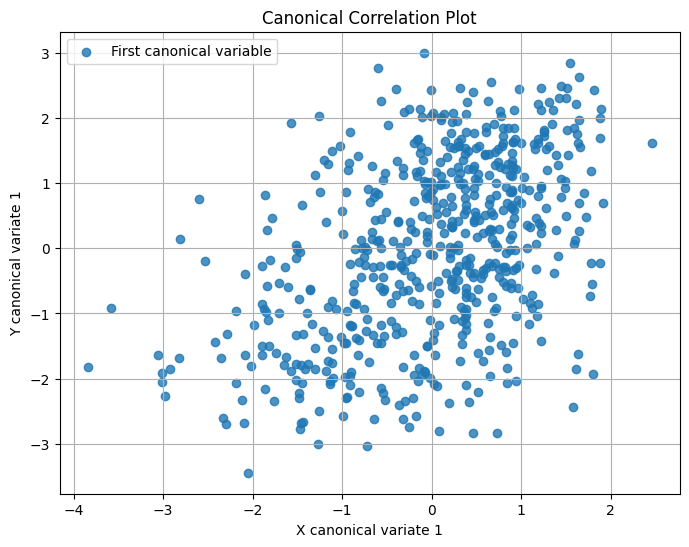

In [34]:
#Plot the Canonical Variates

plt.figure(figsize=(8, 6))
plt.scatter(X_c[:, 0], Y_c[:, 0], label="First canonical variable", alpha=0.8)
plt.xlabel("X canonical variate 1")
plt.ylabel("Y canonical variate 1")
plt.title("Canonical Correlation Plot")
plt.legend()
plt.grid(True)
plt.show()

In [35]:

# These show how much each original variable contributes to the canonical variate
X_weights = cca.x_weights_
Y_weights = cca.y_weights_

print("\nLoadings for Psychological Variables:")
for i, var in enumerate(X.columns):
    print(f"  {var}: {X_weights[i][0]:.4f}")

print("\nLoadings for Academic Variables:")
for i, var in enumerate(Y.columns):
    print(f"  {var}: {Y_weights[i][0]:.4f}")


Loadings for Psychological Variables:
  locus_of_control: 0.8775
  self_concept: -0.1957
  motivation: 0.4378

Loadings for Academic Variables:
  read: 0.5929
  write: 0.7631
  math: 0.2486
  science: -0.0656


**Interpretation:** The canonical correlation analysis produced a correlation of 0.4588, indicating a moderate positive relationship between the psychological and academic variable sets. <br> For the psychological variables, locus of control had the highest positive weight (0.8775), making it the most influential contributor, followed by motivation (0.4378).<br> In contrast, self-concept showed a small negative weight (–0.1957), suggesting a minimal inverse contribution.<br> For the academic variables, writing had the strongest positive weight (0.7631), followed by reading (0.5929) and math (0.2486), while science had a very small negative weight (–0.0656), indicating negligible influence.<br>  Overall, the findings suggest that higher **locus of control** and **motivation** are moderately associated with better performance in **writing and reading** skills.